In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv('housing data.csv', sep=',', names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
                                                       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Estudi del dataframe

### Informació d'atributs:

1. **CRIM**: Taxa de delinqüència per càpita per municipis.
2. **ZN**: Proporció de sòl residencial zonificat per a solars superiors 25.000 peus quadrats.
3. **INDUS**: Proporció d'hectàrees comercials no minoristes per ciutat.
4. **CHAS**: Variable dummy de Charles River (= 1 si limita amb el riu; 0 en cas contrari).
5. **NOX**: Concentració d'òxids nítrics (parts per 10 milions).
6. **RM**: Nombre mitjà d'habitacions per habitatge.
7. **AGE**: Proporció de les unitats ocupades pel propietari construïdes abans de 1940.
8. **DIS**: Distàncies ponderades fins a cinc centres d'ocupació de Boston.
9. **RAD**: Índex d'accessibilitat a les carreteres radials.
10. **TAX**: Valor total de l'impost sobre la propietat per 10.000$.
11. **PTRATIO**: Ràtio alumnes-professor per municipis.
12. **B**: 1000(Bk - 0,63)^2 on Bk és la proporció de negres per municipi.
13. **LSTAT**: % d'estatus inferior de la població.
14. **MEDV**: Valor mitjà de les cases ocupades pel propietari en 1.000 dòlars.
     
***Opinió personal: l'atribut 12 és indignant.***

In [2]:
# Informació sobre el nombre de columnes, de files i el seu tipus de dada

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


El dataframe consta de 14 columnes i 506 files. 

Totes les dades són de tipus float menys CHAS i RAD, que són de tipus INT.

In [3]:
# Descripció estadística del dataframe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [4]:
# Comprovem que no hi hagi valors nulls

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No hi ha valors nulls.

In [5]:
# Comprovem si hi ha duplicats

df[df.duplicated]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


No hi ha duplicats.

In [6]:
# Mirem el nombre de valors únics en cada columna per a trobar columnes susceptibles de ser transformades en dummies.

df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

Com podem veure, CHAS té 2 valors únics (és una columna dummy) i RAD en té 9 (la podem transformar en dummy).

<Axes: >

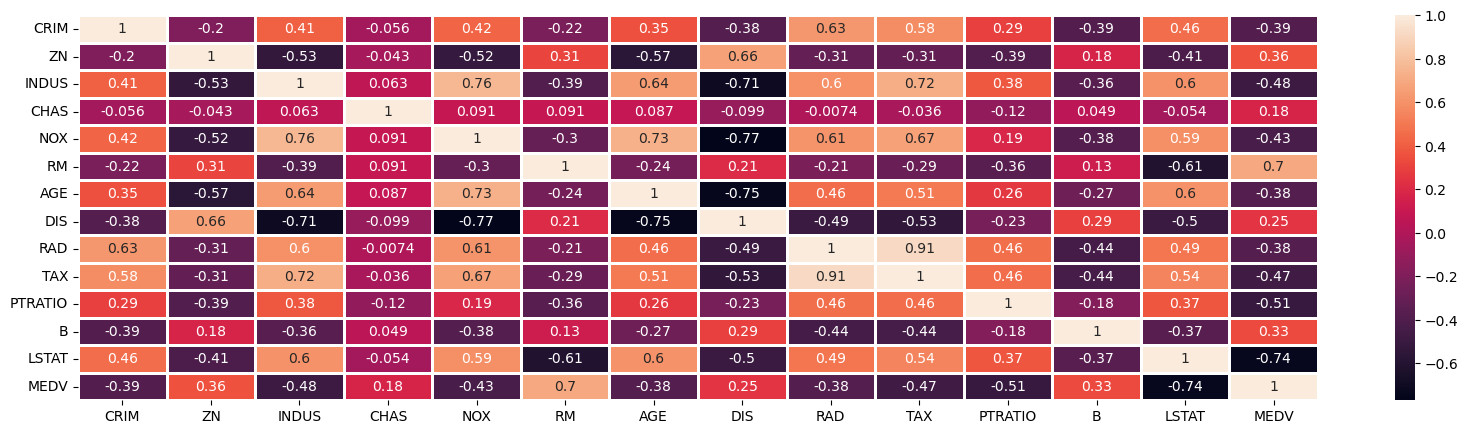

In [7]:
# Fem un mapa de calor per veure les correlacions entre variables

plt.figure(figsize=(20, 5))

sns.heatmap(df.corr(), linewidths=1, linecolor='white', annot=True)

El valor que volem predir (target) és el MEDV (preu). 

Com podem veure, les variables que tenen una correlació forta amb el preu amb molta diferència són LSTAT (% d'estatus inferior de la població), ja que com més pobre sigui un barri menys valdrà la vivenda (correlació negativa) i RM (Nombre mitjà d'habitacions per habitatge), ja que normalment com més habitacions té una vivenda més cara és (correlació positiva). 

INDUS, TAX i PTRATIO tenen una correlació moderada amb MEDV, i la resta tenen una correlació dèbil o directament podriem considerar que no tenen correlació.

A destacar la correlació positiva quasi perfecta entre TAX i RAD.

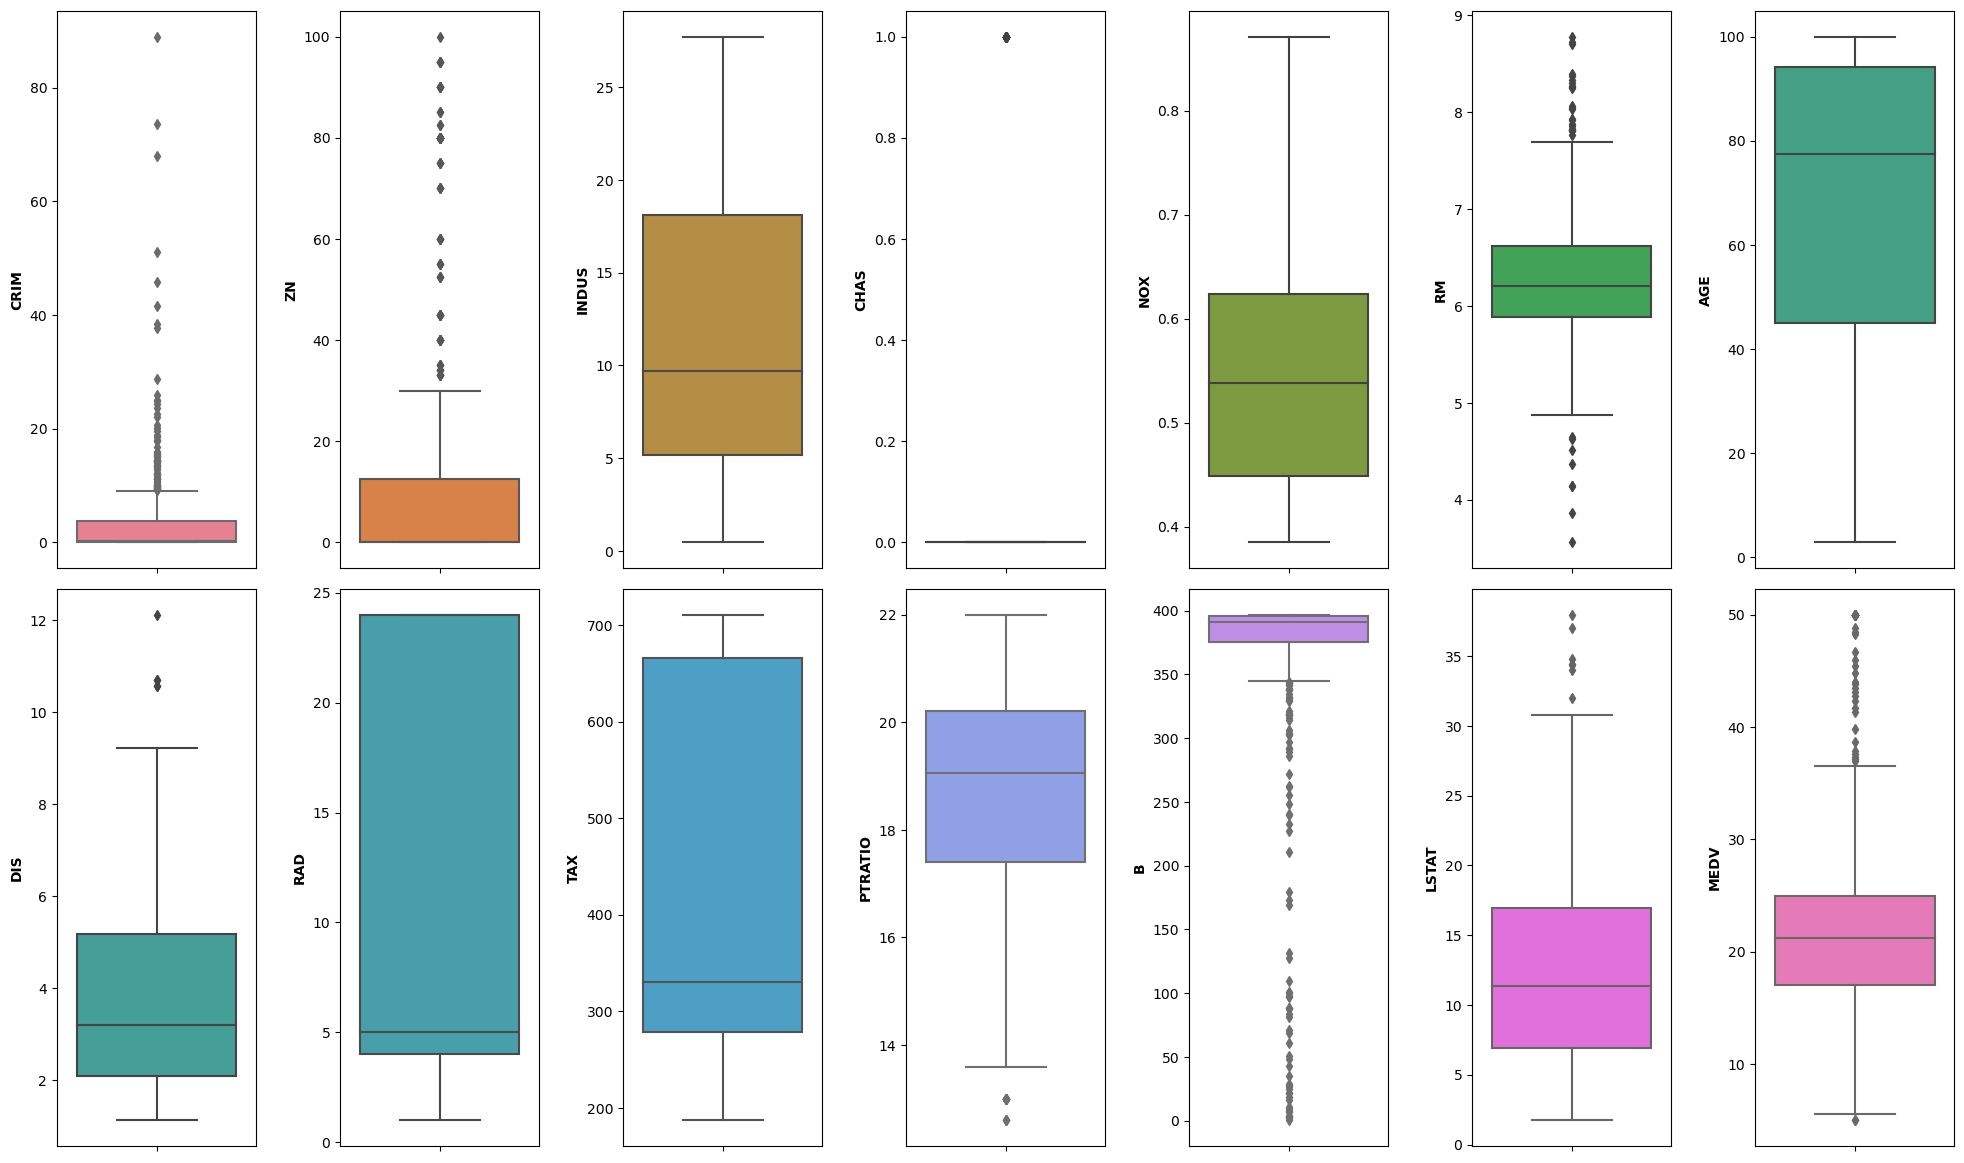

In [8]:
# Fem un boxplot de cada variable per veure els outliers que tenen

colors = sns.color_palette("husl", len(df.columns))

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 12))
count = 0
axs = axs.flatten()

for i, column in enumerate(df.columns):
    sns.boxplot(y=column, data=df, ax=axs[count], color=colors[i])
    axs[count].set_ylabel(column, fontweight='bold')
    count += 1

plt.tight_layout(pad=2, w_pad=2, h_pad=1)
plt.show()

Les variables amb outliers són: 'CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO' ,'B' ,'LSTAT' i 'MEDV'. 'MEDV' és la variable target i 
en models de regressió lineal, normalment no es normalitza ni s'estandaritza la variable target, ja que els coeficients del model resultant s'interpreten en relació amb l'escala original de la variable target. A la resta de variables aplicarem RobustScaler.

Les variables sense outliers són: 'INDUS', 'NOX', 'AGE' i 'TAX'. A aquestes aplicarem MinMaxScaler. 

Si ens fixem en els preus, estàn desactualitzats, ja que la base de dades és de 1978. Segons dades oficials, el preu promig al març 2023 d'una casa a Boston era de 830,000$, per tant calcularem quantes vegades ha augmentat el valor des de 1978 fins ara.

In [9]:
# Fem copia abans del preprocessat per no modificar el dataframe original

df_copy = df.copy()

In [10]:
#Calculem la mitjana i apliquem la revalorització a cada valor

preu_actual = 830 #ja que la unitat son milers

mitjana_preus = df_copy['MEDV'].mean()

increment = preu_actual/mitjana_preus

df_copy.loc[:, 'MEDV'] = (df_copy['MEDV'] * increment)

df_copy

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,884.044345
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,795.639910
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,1278.180782
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,1230.295046
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,1333.433553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,825.108055
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,758.804729
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,880.360827
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,810.373983



# Exercici 1

### Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

### També adjunt trobaràs una descripció de les diferents variables del dataset.

In [11]:
from sklearn.model_selection import train_test_split

X = df_copy.drop('MEDV', axis=1)
y = df_copy['MEDV'] # Variable objectiu

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print('\nAnàlisi descriptiu del conjunt d\'entrenament \n')
print(X_train.describe().astype(int))

print('\nAnàlisi descriptiu del target del conjunt d\'entrenament \n')
print(y_train.describe().astype(int))

print('\nAnàlisi descriptiu del conjunt de test\n')
print(X_test.describe().astype(int))

print('\nAnàlisi descriptiu del target del conjunt de test\n')
print(y_test.describe().astype(int))


Anàlisi descriptiu del conjunt d'entrenament 

       CRIM   ZN  INDUS  CHAS  NOX   RM  AGE  DIS  RAD  TAX  PTRATIO    B  \
count   404  404    404   404  404  404  404  404  404  404      404  404   
mean      3   11     11     0    0    6   68    3    9  408       18  355   
std       9   23      6     0    0    0   28    2    8  169        2   93   
min       0    0      0     0    0    3    6    1    1  188       12    0   
25%       0    0      5     0    0    5   42    2    4  278       17  376   
50%       0    0      9     0    0    6   77    3    5  330       19  392   
75%       3   13     18     0    0    6   93    5   24  666       20  396   
max      88  100     27     1    0    8  100   10   24  711       22  396   

       LSTAT  
count    404  
mean      12  
std        7  
min        1  
25%        6  
50%       11  
75%       17  
max       36  

Anàlisi descriptiu del target del conjunt d'entrenament 

count     404
mean      830
std       349
min       184
25%     

# Exercici 2

### Aplica algun procés de transformació (estandaritzar les dades numèriques, crear columnes dummies, polinomis...).

In [12]:
# Apliquem el test de Shapiro a cada variable per veure si tenen una distribució gaussiana

from scipy.stats import shapiro

for column in df_copy.columns:
    stat, p_value = shapiro(df_copy[column])
    is_normal = "Normal" if p_value > 0.05 else "No normal"
    print(f"{column}: {is_normal}")

CRIM: No normal
ZN: No normal
INDUS: No normal
CHAS: No normal
NOX: No normal
RM: No normal
AGE: No normal
DIS: No normal
RAD: No normal
TAX: No normal
PTRATIO: No normal
B: No normal
LSTAT: No normal
MEDV: No normal


Cap variable és gaussiana.

In [13]:
# Escalament

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler

columnsNorm = ['INDUS', 'NOX', 'AGE', 'TAX']
scaler = preprocessing.MinMaxScaler().fit(df_copy[columnsNorm])
df_copy[columnsNorm] = scaler.transform(df_copy[columnsNorm])

columnsRobust = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO' ,'B', 'LSTAT']
scaler = preprocessing.RobustScaler().fit(df_copy[columnsRobust])
df_copy[columnsRobust] = scaler.transform(df_copy[columnsRobust])

df_copy.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.069593,1.44,0.067815,0,0.314815,0.496612,0.641607,0.285777,1,0.208015,-1.339286,0.261902,-0.637681,884.044345
1,-0.063755,0.00,0.242302,0,0.172840,0.287940,0.782698,0.569789,2,0.104962,-0.446429,0.261902,-0.221889,795.639910
2,-0.063760,0.00,0.242302,0,0.172840,1.323171,0.599382,0.569789,2,0.104962,-0.446429,0.066675,-0.732634,1278.180782
3,-0.062347,0.00,0.063050,0,0.150206,1.069783,0.441813,0.924391,3,0.066794,-0.125000,0.153016,-0.841579,1230.295046
4,-0.052144,0.00,0.063050,0,0.150206,1.271680,0.528321,0.924391,3,0.066794,-0.125000,0.261902,-0.602699,1333.433553


Fem una altra copia del df per a després poder fer representacions sense les dummies.

In [14]:
df_copy_2 = df_copy.copy

In [15]:
# Transformem en dummy 'RAD' ja que només té 9 valors únics

df_copy_2 = pd.get_dummies(df_copy, columns=["RAD"])
df_copy_2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,-0.069593,1.44,0.067815,0,0.314815,0.496612,0.641607,0.285777,0.208015,-1.339286,...,884.044345,1,0,0,0,0,0,0,0,0
1,-0.063755,0.00,0.242302,0,0.172840,0.287940,0.782698,0.569789,0.104962,-0.446429,...,795.639910,0,1,0,0,0,0,0,0,0
2,-0.063760,0.00,0.242302,0,0.172840,1.323171,0.599382,0.569789,0.104962,-0.446429,...,1278.180782,0,1,0,0,0,0,0,0,0
3,-0.062347,0.00,0.063050,0,0.150206,1.069783,0.441813,0.924391,0.066794,-0.125000,...,1230.295046,0,0,1,0,0,0,0,0,0
4,-0.052144,0.00,0.063050,0,0.150206,1.271680,0.528321,0.924391,0.066794,-0.125000,...,1333.433553,0,0,1,0,0,0,0,0,0


# Exercici 3

### Resumeix les noves columnes generades de manera estadística i gràfica.

In [16]:
df_copy_2.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,...,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,0.93,0.91,0.39,0.07,0.35,0.10,0.68,0.19,0.42,-0.21,...,830.00,0.04,0.05,0.08,0.22,0.23,0.05,0.03,0.05,0.26
std,2.39,1.87,0.25,0.25,0.24,0.95,0.29,0.68,0.32,0.77,...,338.78,0.20,0.21,0.26,0.41,0.42,0.22,0.18,0.21,0.44
min,-0.07,0.00,0.00,0.00,0.00,-3.59,0.00,-0.67,0.00,-2.30,...,184.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.05,0.00,0.17,0.00,0.13,-0.44,0.43,-0.36,0.18,-0.59,...,627.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.00,0.00,0.34,0.00,0.31,0.00,0.77,0.00,0.27,0.00,...,780.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.95,1.00,0.65,0.00,0.49,0.56,0.94,0.64,0.91,0.41,...,920.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,24.68,8.00,1.00,1.00,1.00,3.48,1.00,2.89,1.00,1.05,...,1841.76,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Fem un altre boxplot amb totes les variables on hem aplicat RobustScaler o MinMaxScaler.

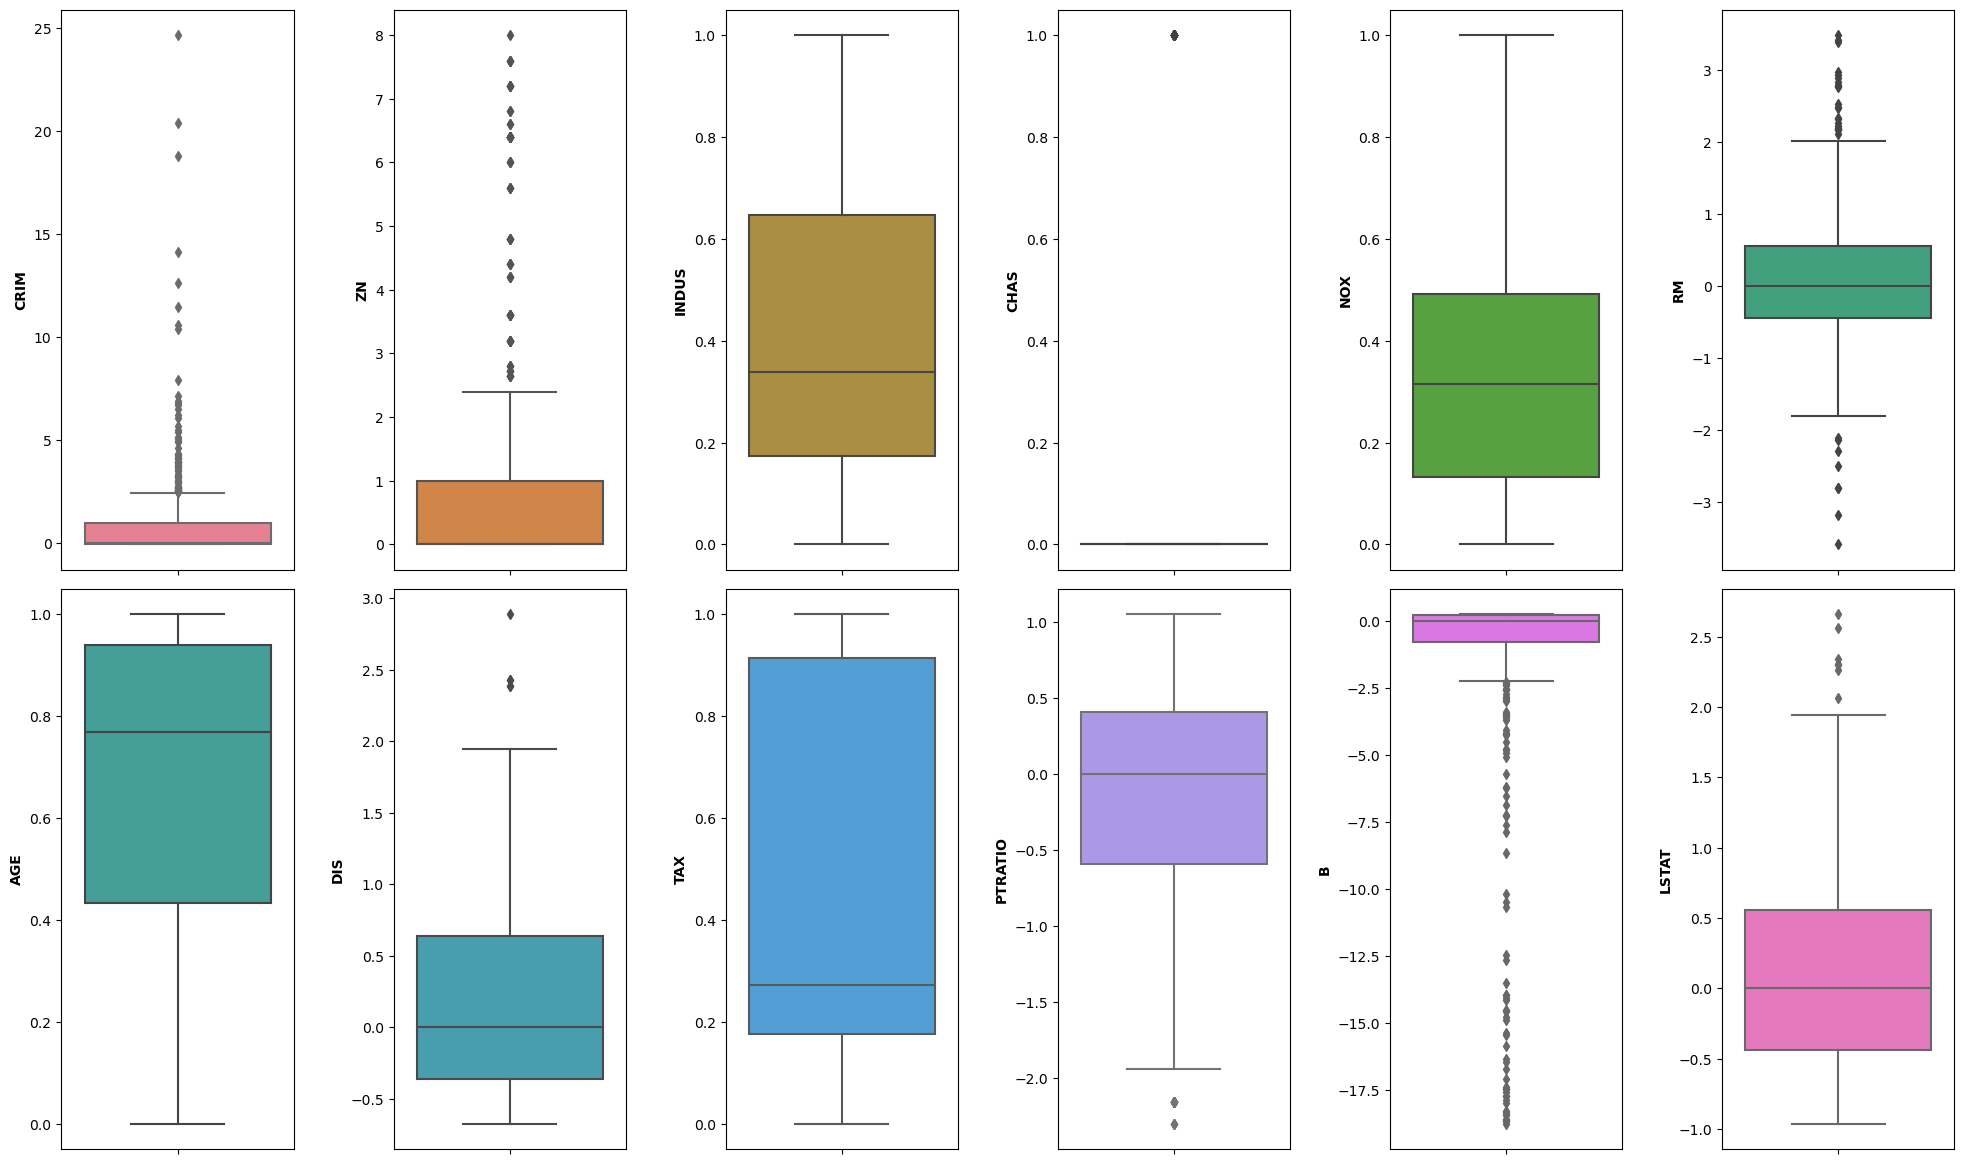

In [17]:
df_filtered = df_copy.drop(["MEDV", "RAD"], axis=1)

colors = sns.color_palette("husl", len(df_filtered.columns))

fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 12))
count = 0
axs = axs.flatten()

for i, column in enumerate(df_filtered.columns):
    sns.boxplot(y=column, data=df_copy, ax=axs[count], color=colors[i])
    axs[count].set_ylabel(column, fontweight='bold')
    count += 1

plt.tight_layout(pad=2, w_pad=2, h_pad=1)
plt.show()

Com podem veure, les dades on hem aplicat MinMaxScaler ('INDUS', 'NOX', 'AGE' i 'TAX') tenen un rang d'entre 0 i 1. El valor mínim de la variable original s'assigna a 0 a les dades normalitzades, mentre que el valor màxim s'assigna a 1. Els valors intermedis s'escalen proporcionalment dins aquest rang.

En quant a les que hem aplicat RobustScaler ('CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO' ,'B' i 'LSTAT') estàn centrades al voltant d'una mitjana de 0, cosa que ajuda a eliminar els biaixos causats pels valors atípics. Això resulta en una distribució més robusta i menys sensible als valors extrems.